<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/computational_photography_module_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

[Computational Photography module](https://docs.opencv.org/master/d1/d0d/group__photo.html) included in OpenCV  includes several photo processing algorithms. As this module includes different processing algorithms providing nice visualizations and effects, we think it is nice to include them in this notebook mainly for visualization purposes. This module includes the following (in bold, the examples we are going to cover in this notebook):
*   Inpainting
*   **Denoising**
*   HDR imaging
*   **Contrast Preserving Decolorization**
*   Seamless Cloning
*   **Non-Photorealistic Rendering**




# Contrast preserving decolorization
`cv2.decolor()` can be used for decolorization (contrast preserving decolorization). Extracted from the documentation "*Transforms a color image to a grayscale image. It is a basic tool in digital printing, stylized black-and-white photograph rendering, and in many single channel image processing applications*". `cv2.cvtColor()` converts color image into a gray scale, but it loses the contrast of the original image. `cv2.decolor()` preserves contrast.

<img align="left" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/icon_book.png" width=50 px>

*Cewu Lu, Li Xu, and Jiaya Jia. **Contrast preserving decolorization**. In Computational Photography (ICCP), 2012 IEEE International Conference on, pages 1–7. IEEE, 2012.*




Download the two images that will be used in this example

In [30]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/HappyFish.jpg
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/flowers.png

--2021-03-05 14:09:19--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/HappyFish.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8283 (8.1K) [image/jpeg]
Saving to: ‘HappyFish.jpg.2’

HappyFish.jpg.2     100%[===================>]   8.09K  --.-KB/s    in 0s      

2021-03-05 14:09:19 (88.9 MB/s) - ‘HappyFish.jpg.2’ saved [8283/8283]

--2021-03-05 14:09:19--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/flowers.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting respon

Define a utility function `show_img_with_matplotlib()` just to show multi-figure images with matplotlib

In [27]:
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    # plt.axis('off')


We try `cv2.decolor()`, which requieres a BGR image as input

In [18]:
import cv2

img = cv2.imread("/content/HappyFish.jpg")
gray_img_decolor, boost_img_decolor = cv2.decolor(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Show the results using the function `show_img_with_matplotlib()`, which has been previously defined

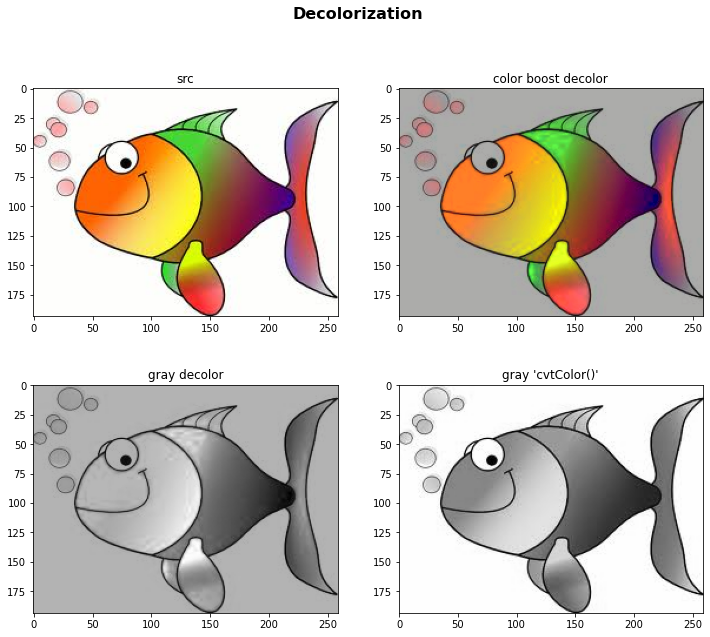

In [29]:
# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 10))
plt.suptitle("Decolorization", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(boost_img_decolor, "color boost decolor", 2)
show_img_with_matplotlib(cv2.cvtColor(gray_img_decolor, cv2.COLOR_GRAY2BGR), "gray decolor", 3)
show_img_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray 'cvtColor()'", 4)

# Show the figure:
plt.show()

Here, another example of contrast preserving decolorization using `cv2.decolor()`.

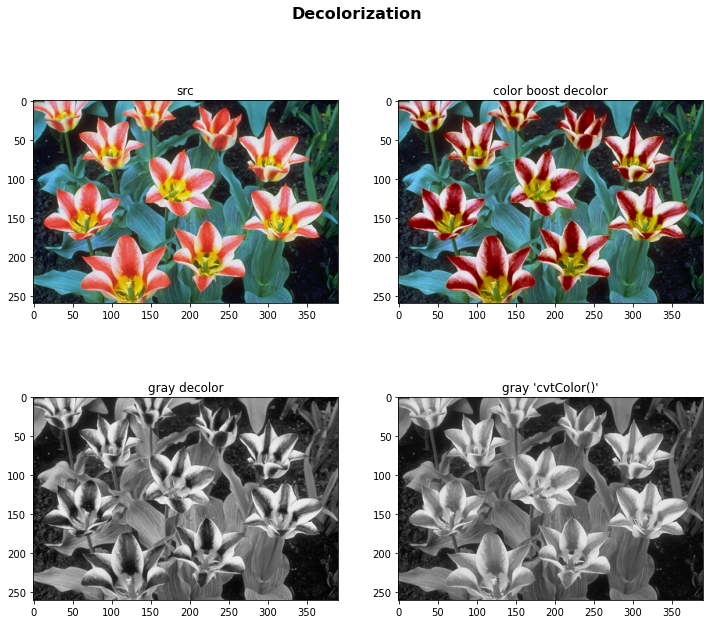

In [31]:
import cv2

img = cv2.imread("/content/flowers.png")
gray_img_decolor, boost_img_decolor = cv2.decolor(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 10))
plt.suptitle("Decolorization", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(boost_img_decolor, "color boost decolor", 2)
show_img_with_matplotlib(cv2.cvtColor(gray_img_decolor, cv2.COLOR_GRAY2BGR), "gray decolor", 3)
show_img_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray 'cvtColor()'", 4)

# Show the figure:
plt.show()

# Non-photorealistic Rendering

[Non-photorealistic rendering](https://docs.opencv.org/master/df/dac/group__photo__render.html) in OpenCV includes the following functions:
*  cv2.detailEnhance()
*  cv2.edgePreservingFilter()
*  cv2.pencilSketch()
*  cv2.stylization()

For a deep understanding of this functions, we recommend to see the webpage [Domain Transform for Edge-Aware Image and Video Processing](https://www.inf.ufrgs.br/~eslgastal/DomainTransform/). They presented a new approach for performing high-quality edge-preserving filtering of images and videos in real time. They also demonstrated the versatility of their domain transform and edge-preserving filters on several real-time image and video processing tasks including edge-preserving filtering, depth-of-field effects, stylization, recoloring, colorization, detail enhancement, and tone mapping. Most of these tasks are included and implemented in OpenCV by mean of the previous introduced functions, which are shown next.

These functions have in common two parameters: `sigma_s` and `sigma_r`. As nicely introduced [here](https://learnopencv.com/non-photorealistic-rendering-using-opencv-python-c/):

*In edge preserving filters there are two competing objectives: a) smooth the image, b) don’t smooth the edges/color boundaries. In other words we cannot simply replace the color of a pixel by the weighted sum of its neighbors. Instead, we want to replace the color value at a pixel by the average of pixels in the neighborhood which also have color similar to the pixel. So we have two parameters : `sigma_s` and `sigma_r`. Just like other smoothing filters `sigma_s` controls the size of the neighborhood, and `sigma_r` controls the how dissimilar colors within the neighborhood will be averaged. A larger `sigma_r` results in large regions of constant color.*



## Pencil sketch

Pencil-like non-photorealistic line drawing can be achieved using `cv2.pencilSketch()`. Default values are: `cv2.pencilSketch(src, sigma_s=60, sigma_r=0.07, shade_factor=0.02)` and:

*   `sigma_s` – Range between `0` to `200`.
*   `sigma_r` – Range between `0` to `1`.
*   `shade_factor` – Range between `0` to `0.1`.




In [42]:
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    # plt.axis('off')

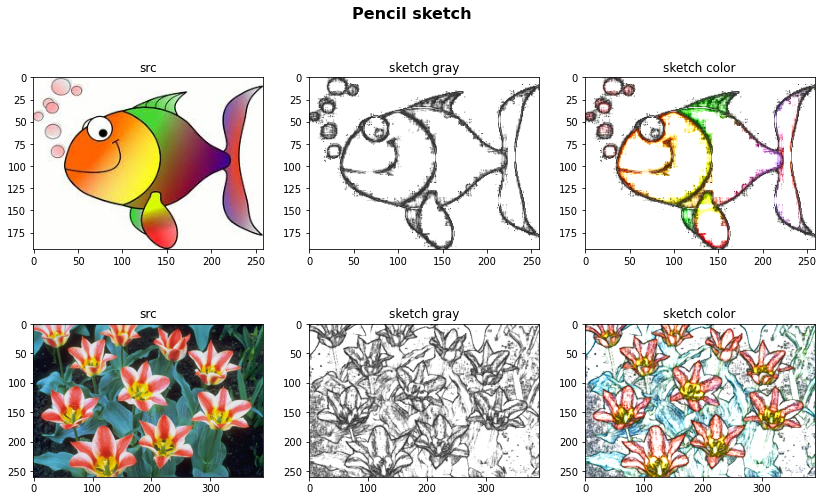

In [44]:
import cv2

img = cv2.imread("/content/HappyFish.jpg")
img_2 = cv2.imread("/content/flowers.png")

sketch_gray, sketch_color = cv2.pencilSketch(img, sigma_s=30, sigma_r=0.1, shade_factor=0.1)
sketch_gray_2, sketch_color_2 = cv2.pencilSketch(img_2, sigma_s=30, sigma_r=0.1, shade_factor=0.1)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 8))
plt.suptitle("Pencil sketch", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(cv2.cvtColor(sketch_gray, cv2.COLOR_GRAY2BGR), "sketch gray", 2)
show_img_with_matplotlib(sketch_color, "sketch color", 3)

show_img_with_matplotlib(img_2, "src", 4)
show_img_with_matplotlib(cv2.cvtColor(sketch_gray_2, cv2.COLOR_GRAY2BGR), "sketch gray", 5)
show_img_with_matplotlib(sketch_color_2, "sketch color", 6)

# Show the figure:
plt.show()

## Stylization

Stylization aims to produce digital imagery with a wide variety of effects not focused on photorealism. Edge-aware filters are ideal for stylization, as they can abstract regions of low contrast while preserving, or enhancing, high-contrast features. Default values are `cv2.stylization(src, sigma_s=60,  sigma_r=0.45)` and:

*   `sigma_s` – Range between `0` to `200`.
*   `sigma_r` – Range between `0` to `1`.

In [45]:
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    # plt.axis('off')

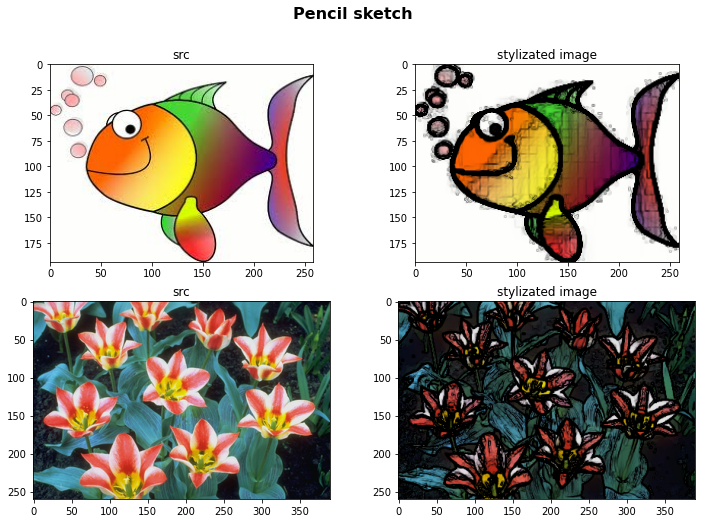

In [47]:
import cv2

img = cv2.imread("/content/HappyFish.jpg")
img_2 = cv2.imread("/content/flowers.png")

stylizated_image = cv2.stylization(img, sigma_s=60, sigma_r=0.07)
stylizated_image_2 = cv2.stylization(img_2, sigma_s=60, sigma_r=0.07)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 8))
plt.suptitle("Pencil sketch", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(stylizated_image, "stylizated image", 2)

show_img_with_matplotlib(img_2, "src", 3)
show_img_with_matplotlib(stylizated_image_2, "stylizated image", 4)

# Show the figure:
plt.show()

## Detail enhance

This filter enhances the details of a particular image. Default values are `cv2.detailEnhance(src, sigma_s=10,sigma_r=0.15)` and:

*   `sigma_s` – Range between `0` to `200`.
*   `sigma_r` – Range between `0` to `1`.





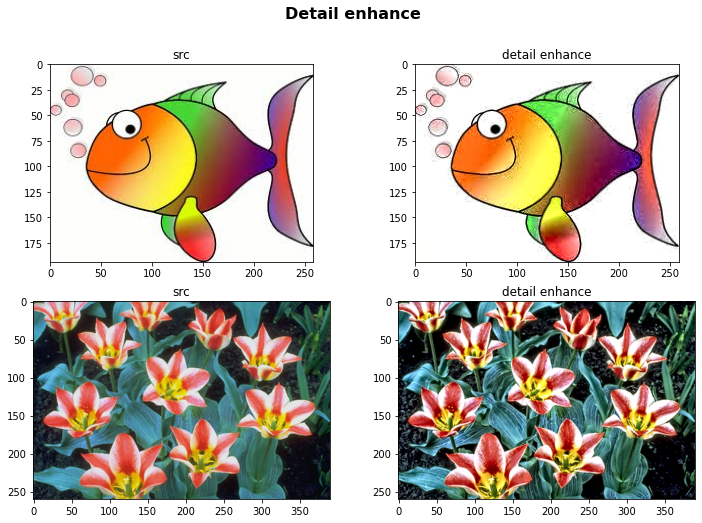

In [51]:
import cv2

img = cv2.imread("/content/HappyFish.jpg")
img_2 = cv2.imread("/content/flowers.png")

enhanced_image = cv2.detailEnhance(img, sigma_s=60, sigma_r=0.07)
enhanced_image_2 = cv2.detailEnhance(img_2, sigma_s=60, sigma_r=0.07)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 8))
plt.suptitle("Detail enhance", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(enhanced_image, "detail enhance", 2)

show_img_with_matplotlib(img_2, "src", 3)
show_img_with_matplotlib(enhanced_image_2, "detail enhance", 4)

# Show the figure:
plt.show()

## Edge preserving filter

Filtering is the fundamental operation in image and video processing. Edge-preserving smoothing filters are used in many different applications. 

<img align="left" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/icon_book.png" width=50 px>

*Eduardo S. L. Gastal, Manuel M. Oliveira, “**Domain transform for edge-aware image and video processing**”, ACM Trans. Graph. 30(4): 69, 2011.*

Default values are `cv2.edgePreservingFilter(src, flags=1, sigma_s=60, sigma_r=0.4)`, and:

*   `flags` (Edge preserving filters):`RECURS_FILTER` = `1`, or  `NORMCONV_FILTER` = `2`
*   `sigma_s` – Range between `0` to `200`.
*   `sigma_r` – Range between `0` to `1`.






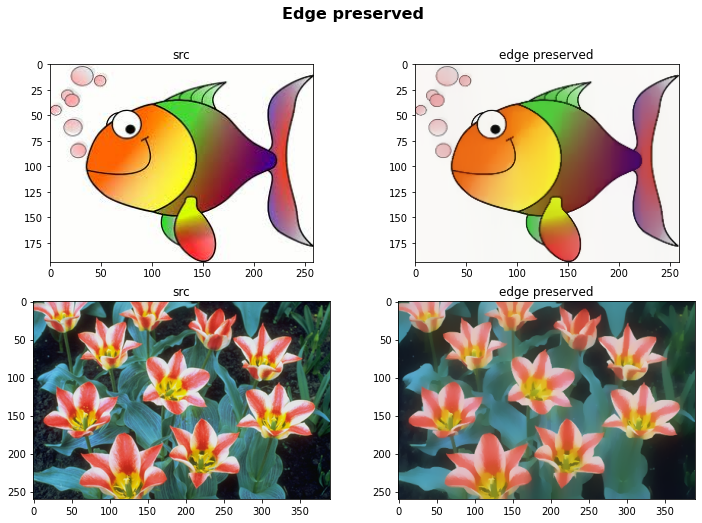

In [57]:
import cv2

img = cv2.imread("/content/HappyFish.jpg")
img_2 = cv2.imread("/content/flowers.png")

edge_preserved_image = cv2.edgePreservingFilter(img, flags=1, sigma_s=200, sigma_r=0.5)
edge_preserved_image_2 = cv2.edgePreservingFilter(img_2, flags=1, sigma_s=200, sigma_r=0.5)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 8))
plt.suptitle("Edge preserved", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(edge_preserved_image, "edge preserved", 2)

show_img_with_matplotlib(img_2, "src", 3)
show_img_with_matplotlib(edge_preserved_image_2, "edge preserved", 4)

# Show the figure:
plt.show()

# Image denoising

OpenCV provides `cv2.fastNlMeansDenoisingColored()` function for color image denoising, which is a modification of `cv2.astNlMeansDenoising()` function for colored images. Default values are:
```
cv2.fastNlMeansDenoisingColored(src, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
```
The function converts image to CIELAB colorspace and then separately denoise L and AB components with given `h `parameters using `cv2.fastNlMeansDenoising()` function. Therefore, parameter `h` is the regulating filter strength for luminance component. Bigger `h` value perfectly removes noise but also removes image details, smaller `h` value preserves details but also preserves some noise. Additionally, both parameters `templateWindowSize` (recommended value `7` pixels) and `searchWindowSize` (recommended value `21` pixels) should be odd. `searchWindowSize` affect performance linearly: greater `searchWindowsSize` the greater denoising time.

<img align="left" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/icon_book.png" width=50 px>

*Antoni Buades, Bartomeu Coll, and Jean-Michel Morel, **Non-Local Means Denoising**, Image Processing On Line, 1 (2011), pp. 208–212.*




In [58]:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/noisy.png

--2021-03-05 16:42:38--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/noisy.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343985 (336K) [image/png]
Saving to: ‘noisy.png’

noisy.png           100%[===================>] 335.92K  --.-KB/s    in 0.06s   

2021-03-05 16:42:38 (5.31 MB/s) - ‘noisy.png’ saved [343985/343985]



In [59]:
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    # plt.axis('off')

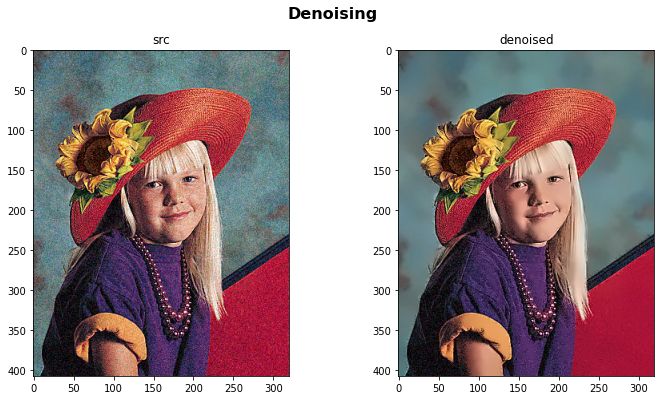

In [65]:
import cv2

img = cv2.imread('/content/noisy.png')
img_denoised = cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(12, 6))
plt.suptitle("Denoising", fontsize=16, fontweight='bold')

# Show all the images:
show_img_with_matplotlib(img, "src", 1)
show_img_with_matplotlib(img_denoised, "denoised", 2)

# Show the figure:
plt.show()

# Conclusions

[Computational Photography module](https://docs.opencv.org/master/d1/d0d/group__photo.html) included in OpenCV  includes several photo processing algorithms. This module includes the following (in bold, the examples we have covered in this notebook):
*   Inpainting
*   **Denoising**
*   HDR imaging
*   **Contrast Preserving Decolorization**
*   Seamless Cloning
*   **Non-Photorealistic Rendering**